In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

D:\priyam\pythontools\envs\Tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\priyam\pythontools\envs\Tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\priyam\pythontools\envs\Tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\priyam\pythontools\envs\Tensorflow\lib\site-packages\tensorflow\

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
train.shape

(1460, 81)

In [5]:
import missingno as msn

In [6]:
train.isna().sum()[1:30]

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley           1369
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
dtype: int64

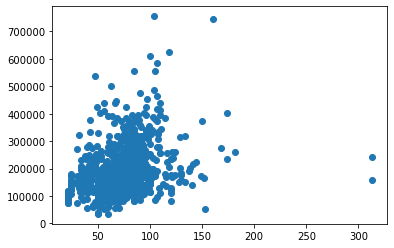

In [7]:
plt.scatter(train['LotFrontage'], train['SalePrice'])

In [8]:
train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].mean())

In [9]:
train['MasVnrArea'].value_counts()

0.0      861
72.0       8
180.0      8
108.0      8
120.0      7
        ... 
651.0      1
337.0      1
415.0      1
293.0      1
621.0      1
Name: MasVnrArea, Length: 327, dtype: int64

In [10]:
train['BsmtQual'].fillna(train['BsmtQual'].mode()[0],inplace = True)
train['BsmtCond'].fillna(train['BsmtCond'].mode()[0],inplace = True)
train['FireplaceQu'].fillna(train['FireplaceQu'].mode()[0],inplace = True)
train['GarageType'].fillna(train['GarageType'].mode()[0],inplace = True)
train['GarageFinish'].fillna(train['GarageFinish'].mode()[0],inplace = True)
train['GarageQual'].fillna(train['GarageQual'].mode()[0],inplace = True)
train['GarageCond'].fillna(train['GarageCond'].mode()[0],inplace = True)
train['BsmtExposure'].fillna(train['BsmtExposure'].mode()[0],inplace = True)
train['BsmtFinType1'].fillna(train['BsmtFinType1'].mode()[0],inplace = True)
train['BsmtFinType2'].fillna(train['BsmtFinType2'].mode()[0],inplace = True)
train['Electrical'].fillna(train['Electrical'].mode()[0],inplace = True)
train['MasVnrType'].fillna(train['MasVnrType'].mode()[0],inplace = True)
train['MasVnrArea'].fillna(train['MasVnrArea'].mean(),inplace = True)

In [11]:
train.isna().sum()[60:]

GarageFinish        0
GarageCars          0
GarageArea          0
GarageQual          0
GarageCond          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1453
Fence            1179
MiscFeature      1406
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
dtype: int64

In [12]:
train.drop('PoolQC', axis=1, inplace= True)
train.drop('MiscFeature', axis=1, inplace= True)
train.drop('Fence', axis=1, inplace= True)
train.drop('Id', axis=1, inplace= True)
train.drop('Alley', axis=1, inplace= True)
train.drop('GarageYrBlt', axis = 1, inplace = True)

In [13]:
train.shape

(1460, 75)

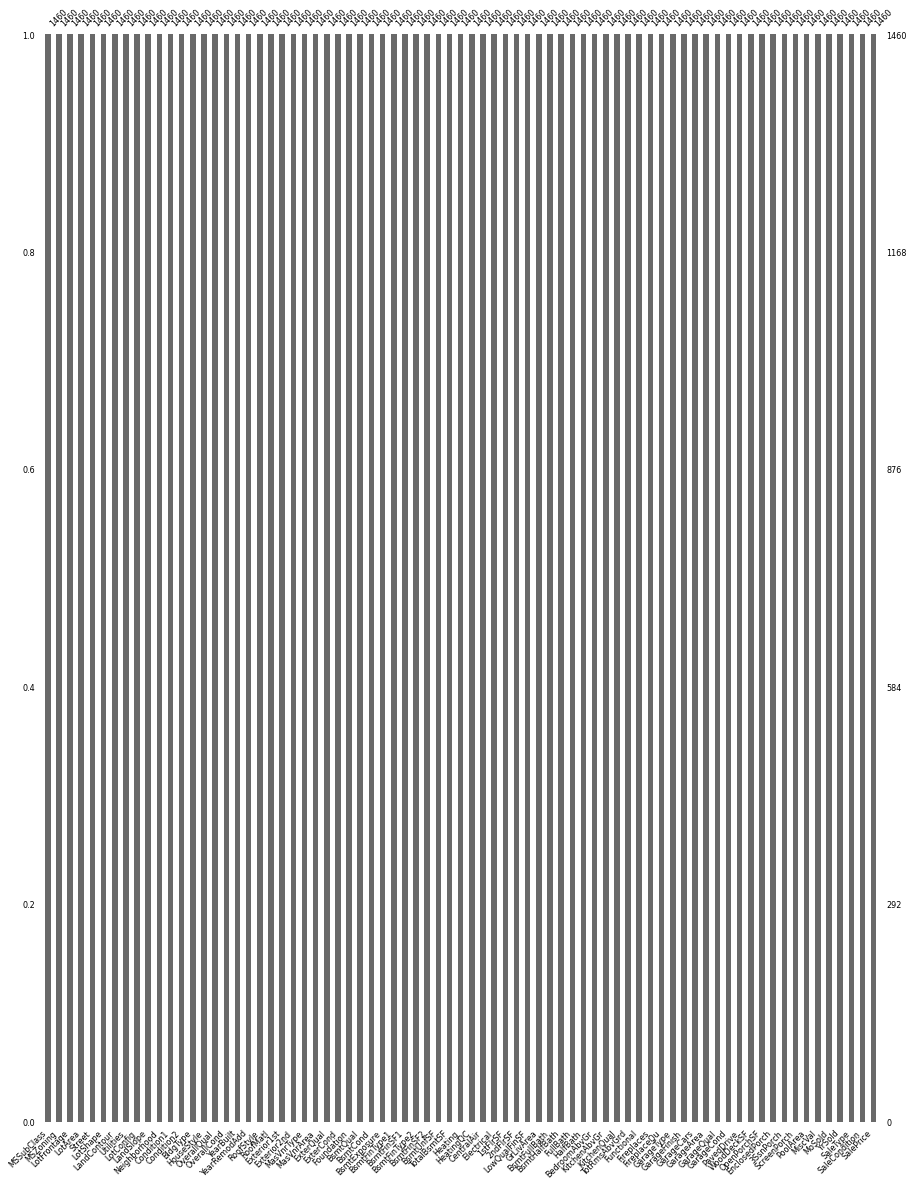

In [14]:
msn.bar(train,figsize=(15,20),labels= True,fontsize = 8)

In [15]:
train.shape

(1460, 75)

In [16]:
main_df = train.copy()

In [17]:
test_new = pd.read_csv('newtestfilefinal.csv')

In [18]:
train.shape

(1460, 75)

In [19]:
test_new.shape

(1459, 74)

In [20]:
final_df = pd.concat([train,test_new],axis = 0)

In [21]:
final_df.shape

(2919, 75)

In [22]:
1460+1447

2907

In [23]:
final_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

In [24]:
final_df['SaleCondition'].value_counts()


Normal     2402
Partial     245
Abnorml     190
Family       46
Alloca       24
AdjLand      12
Name: SaleCondition, dtype: int64

In [25]:
columns = ['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2',
          'BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation',
          'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional',
          'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition']

In [26]:
for i in columns:
    print(i)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [27]:
len(columns)

39

In [29]:
df_1 = pd.get_dummies(final_df, columns= columns , drop_first= True)

In [30]:
df_1.shape

(2919, 236)

In [31]:
df_1 = df_1.loc[:,~df_1.columns.duplicated()]

In [32]:
df_1.shape

(2919, 236)

In [33]:
df_1 = df_1.loc[:,~df_1.columns.duplicated()]

In [34]:
df_1.shape

(2919, 236)

In [35]:
df_1_train = df_1.iloc[:1460,:]
df_1_test = df_1.iloc[1460:,:]


In [36]:
df_1_test.shape

(1459, 236)

In [38]:
df_1_test.drop('SalePrice',axis =1 ,inplace= True)

D:\priyam\pythontools\envs\Tensorflow\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [39]:
df_1_train.shape

(1460, 236)

In [40]:
df_1_test.shape

(1459, 235)

In [41]:
X_train = df_1_train.drop('SalePrice', axis = 1)
y_train = df_1_train['SalePrice']

In [42]:
import xgboost as xgb

In [43]:
classifierxg = xgb.XGBRegressor()
classifierxg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [45]:
y_pred = classifierxg.predict(df_1_test)

In [46]:
classifierxg.score(X_train,y_train)


0.9993792981928472

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
rf = RandomForestRegressor()

In [49]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [50]:
y_pred_rf = rf.predict(df_1_test)
rf.score(X_train,y_train)

0.9791938322877801

In [51]:
import pickle
filename = 'classifierxg.pk1'
pickle.dump(classifierxg,open(filename,'wb'))

In [52]:
pred =pd.DataFrame(y_pred)

In [53]:
sample_file = pd.read_csv('sample_submission.csv')

In [59]:
y_pred

array([117859.91, 159921.28, 182751.1 , ..., 170050.73, 111587.87,
       226632.52], dtype=float32)

In [54]:
final_dataset = pd.concat([sample_file['Id'],pred],axis = 1)
final_dataset.columns = ['Id', 'SalePrice']
final_dataset.to_csv('Submission_file_final.csv',index = False)

In [55]:
my_file = pd.read_csv('Submission_file_final.csv')

In [56]:
my_file.head()

,Id,SalePrice
0,1461,117859.91
1,1462,159921.28
2,1463,182751.10
3,1464,191127.30
4,1465,183522.06
